In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns

# Filter out the warnings
import warnings
warnings.filterwarnings("ignore")

/Users/ankithb/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv(r"202402-capitalbikeshare-tripdata 2.csv")

In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,24DBACC298E33BF6,electric_bike,2/1/24 21:18,2/1/24 21:27,Eckington Pl & Q St NE,31505.0,5th & K St NW,31600.0,38.910893,-77.005023,38.90304,-77.019027,member
1,FE1067800A18BC56,electric_bike,2/6/24 17:15,2/6/24 17:30,4th & C St SW,31243.0,NaN,NaN,38.886443,-77.017388,38.91000,-76.980000,member
2,AD1962B215B5879D,electric_bike,2/26/24 13:19,2/26/24 13:30,North Capitol St & F St NW,31624.0,NaN,NaN,38.896907,-77.009684,38.90000,-77.010000,member
3,3F8352E6D9EC4F85,electric_bike,2/2/24 11:01,2/2/24 11:05,1st & K St NE,31662.0,NaN,NaN,38.902394,-77.005614,38.90000,-77.010000,member
4,D656DA87FA915F14,electric_bike,2/25/24 8:28,2/25/24 8:48,Virginia Ave & 25th St NW,31297.0,NaN,NaN,38.898456,-77.053075,38.91000,-77.060000,member


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318688 entries, 0 to 318687
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             318688 non-null  object 
 1   rideable_type       318688 non-null  object 
 2   started_at          318688 non-null  object 
 3   ended_at            318688 non-null  object 
 4   start_station_name  270637 non-null  object 
 5   start_station_id    270637 non-null  float64
 6   end_station_name    267827 non-null  object 
 7   end_station_id      267824 non-null  float64
 8   start_lat           318688 non-null  float64
 9   start_lng           318688 non-null  float64
 10  end_lat             318444 non-null  float64
 11  end_lng             318444 non-null  float64
 12  member_casual       318688 non-null  object 
dtypes: float64(6), object(7)
memory usage: 31.6+ MB


In [5]:
df.drop(["start_station_id", "end_station_id"], axis=1, inplace=True)

In [6]:
df.drop(["ride_id"], axis=1, inplace=True)

In [7]:
df["rideable_type"].unique()

array(['electric_bike', 'classic_bike'], dtype=object)

In [8]:
df.dropna(axis=0, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246639 entries, 0 to 318687
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   rideable_type       246639 non-null  object 
 1   started_at          246639 non-null  object 
 2   ended_at            246639 non-null  object 
 3   start_station_name  246639 non-null  object 
 4   end_station_name    246639 non-null  object 
 5   start_lat           246639 non-null  float64
 6   start_lng           246639 non-null  float64
 7   end_lat             246639 non-null  float64
 8   end_lng             246639 non-null  float64
 9   member_casual       246639 non-null  object 
dtypes: float64(4), object(6)
memory usage: 20.7+ MB


In [10]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,electric_bike,2/1/24 21:18,2/1/24 21:27,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,member
16,electric_bike,2/15/24 16:46,2/15/24 16:59,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,member
17,classic_bike,2/7/24 17:42,2/7/24 18:12,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,member
18,classic_bike,2/22/24 16:43,2/22/24 16:56,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,member
19,classic_bike,2/10/24 1:11,2/10/24 1:23,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,casual


In [11]:
df.reset_index(drop=True, inplace=True)

In [12]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,electric_bike,2/1/24 21:18,2/1/24 21:27,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,member
1,electric_bike,2/15/24 16:46,2/15/24 16:59,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,member
2,classic_bike,2/7/24 17:42,2/7/24 18:12,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,member
3,classic_bike,2/22/24 16:43,2/22/24 16:56,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,member
4,classic_bike,2/10/24 1:11,2/10/24 1:23,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,casual


In [13]:
df["started_at"] = pd.to_datetime(df["started_at"])

In [14]:
df["ended_at"] = pd.to_datetime(df["ended_at"])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246639 entries, 0 to 246638
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rideable_type       246639 non-null  object        
 1   started_at          246639 non-null  datetime64[ns]
 2   ended_at            246639 non-null  datetime64[ns]
 3   start_station_name  246639 non-null  object        
 4   end_station_name    246639 non-null  object        
 5   start_lat           246639 non-null  float64       
 6   start_lng           246639 non-null  float64       
 7   end_lat             246639 non-null  float64       
 8   end_lng             246639 non-null  float64       
 9   member_casual       246639 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(4)
memory usage: 18.8+ MB


In [16]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,electric_bike,2024-02-01 21:18:00,2024-02-01 21:27:00,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,member
1,electric_bike,2024-02-15 16:46:00,2024-02-15 16:59:00,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,member
2,classic_bike,2024-02-07 17:42:00,2024-02-07 18:12:00,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,member
3,classic_bike,2024-02-22 16:43:00,2024-02-22 16:56:00,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,member
4,classic_bike,2024-02-10 01:11:00,2024-02-10 01:23:00,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,casual


In [17]:
df["time_duration"] = (df["ended_at"] - df["started_at"]).astype('timedelta64[m]')

In [18]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,time_duration
0,electric_bike,2024-02-01 21:18:00,2024-02-01 21:27:00,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,member,9.0
1,electric_bike,2024-02-15 16:46:00,2024-02-15 16:59:00,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,member,13.0
2,classic_bike,2024-02-07 17:42:00,2024-02-07 18:12:00,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,member,30.0
3,classic_bike,2024-02-22 16:43:00,2024-02-22 16:56:00,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,member,13.0
4,classic_bike,2024-02-10 01:11:00,2024-02-10 01:23:00,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,casual,12.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246639 entries, 0 to 246638
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rideable_type       246639 non-null  object        
 1   started_at          246639 non-null  datetime64[ns]
 2   ended_at            246639 non-null  datetime64[ns]
 3   start_station_name  246639 non-null  object        
 4   end_station_name    246639 non-null  object        
 5   start_lat           246639 non-null  float64       
 6   start_lng           246639 non-null  float64       
 7   end_lat             246639 non-null  float64       
 8   end_lng             246639 non-null  float64       
 9   member_casual       246639 non-null  object        
 10  time_duration       246639 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(4)
memory usage: 20.7+ MB


<AxesSubplot:xlabel='rideable_type', ylabel='count'>

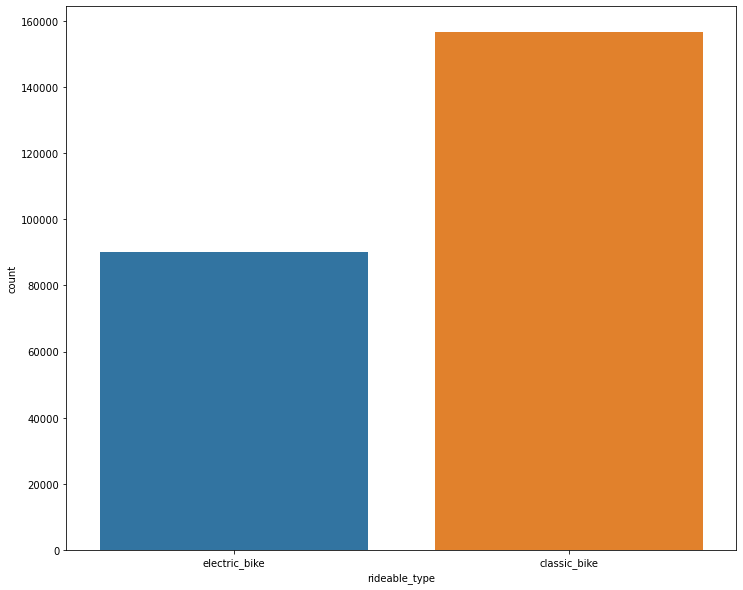

In [20]:
plt.figure(figsize=(12,10))
sns.countplot(df["rideable_type"])

In [21]:
df = pd.get_dummies(df, columns=['rideable_type', 'member_casual'], drop_first=True)

In [22]:
df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member
0,2024-02-01 21:18:00,2024-02-01 21:27:00,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,9.0,1,1
1,2024-02-15 16:46:00,2024-02-15 16:59:00,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,13.0,1,1
2,2024-02-07 17:42:00,2024-02-07 18:12:00,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,30.0,0,1
3,2024-02-22 16:43:00,2024-02-22 16:56:00,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,13.0,0,1
4,2024-02-10 01:11:00,2024-02-10 01:23:00,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,12.0,0,0


In [23]:
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the Haversine distance between two points given their latitude and longitude coordinates.
    """
    R = 6371  # Radius of the Earth in kilometers
    
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = R * c
    
    return distance

In [24]:
df['distance_km'] = haversine_distance(df['start_lat'], df['start_lng'], df['end_lat'], df['end_lng'])

In [25]:
df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km
0,2024-02-01 21:18:00,2024-02-01 21:27:00,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,9.0,1,1,1.493572
1,2024-02-15 16:46:00,2024-02-15 16:59:00,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,13.0,1,1,3.321546
2,2024-02-07 17:42:00,2024-02-07 18:12:00,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,30.0,0,1,4.672147
3,2024-02-22 16:43:00,2024-02-22 16:56:00,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,13.0,0,1,2.276269
4,2024-02-10 01:11:00,2024-02-10 01:23:00,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,12.0,0,0,1.364261


In [26]:
df["start_station_name"].nunique()

764

In [27]:
df["start_station_name"].value_counts()

Columbus Circle / Union Station                        3566
New Hampshire Ave & T St NW                            3023
15th & P St NW                                         2489
Eastern Market Metro / Pennsylvania Ave & 8th St SE    2256
5th & K St NW                                          2188
                                                       ... 
Oak Leaf & Lockwood                                       1
Layton Hall Dr & University Dr                            1
Dennis Ave & Amherst Ave                                  1
Stewart & April                                           1
Mission Square Dr & Miranda Ct                            1
Name: start_station_name, Length: 764, dtype: int64

In [28]:
df["average_speed"] = df["distance_km"] / df["time_duration"] * 60

In [29]:
df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
0,2024-02-01 21:18:00,2024-02-01 21:27:00,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,9.0,1,1,1.493572,9.957149
1,2024-02-15 16:46:00,2024-02-15 16:59:00,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,13.0,1,1,3.321546,15.330212
2,2024-02-07 17:42:00,2024-02-07 18:12:00,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,30.0,0,1,4.672147,9.344294
3,2024-02-22 16:43:00,2024-02-22 16:56:00,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,13.0,0,1,2.276269,10.505857
4,2024-02-10 01:11:00,2024-02-10 01:23:00,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,12.0,0,0,1.364261,6.821307


In [30]:
df["time_duration"].value_counts()

5.0       18423
6.0       18267
7.0       17569
4.0       16963
8.0       16428
          ...  
602.0         1
667.0         1
342.0         1
283.0         1
1078.0        1
Name: time_duration, Length: 476, dtype: int64

(array([2.45937e+05, 4.85000e+02, 4.80000e+01, 2.70000e+01, 1.70000e+01,
        2.50000e+01, 2.70000e+01, 2.80000e+01, 2.60000e+01, 1.90000e+01]),
 array([   0. ,  149.6,  299.2,  448.8,  598.4,  748. ,  897.6, 1047.2,
        1196.8, 1346.4, 1496. ]),
 <BarContainer object of 10 artists>)

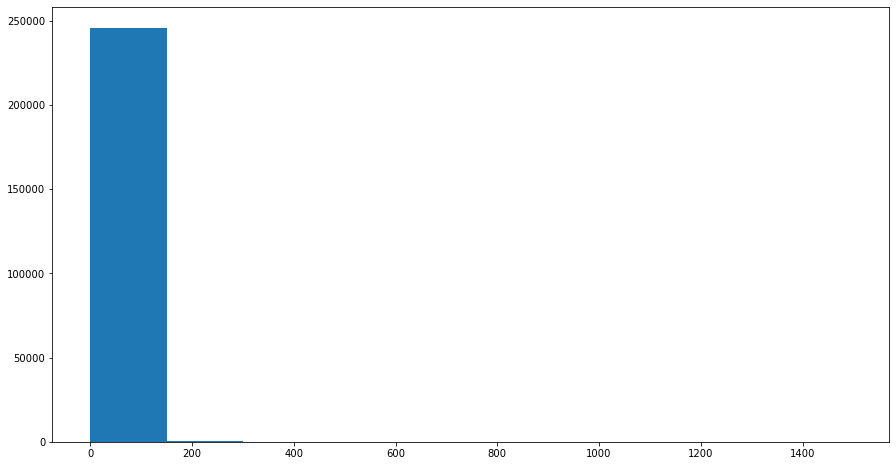

In [31]:
plt.figure(figsize=(15,8))
plt.hist(df["time_duration"])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246639 entries, 0 to 246638
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   started_at                   246639 non-null  datetime64[ns]
 1   ended_at                     246639 non-null  datetime64[ns]
 2   start_station_name           246639 non-null  object        
 3   end_station_name             246639 non-null  object        
 4   start_lat                    246639 non-null  float64       
 5   start_lng                    246639 non-null  float64       
 6   end_lat                      246639 non-null  float64       
 7   end_lng                      246639 non-null  float64       
 8   time_duration                246639 non-null  float64       
 9   rideable_type_electric_bike  246639 non-null  uint8         
 10  member_casual_member         246639 non-null  uint8         
 11  distance_km               

In [33]:
df.drop(df[df["time_duration"] <= 0].index, axis = 0, inplace=True)

In [34]:
df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
0,2024-02-01 21:18:00,2024-02-01 21:27:00,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,9.0,1,1,1.493572,9.957149
1,2024-02-15 16:46:00,2024-02-15 16:59:00,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,13.0,1,1,3.321546,15.330212
2,2024-02-07 17:42:00,2024-02-07 18:12:00,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,30.0,0,1,4.672147,9.344294
3,2024-02-22 16:43:00,2024-02-22 16:56:00,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,13.0,0,1,2.276269,10.505857
4,2024-02-10 01:11:00,2024-02-10 01:23:00,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,12.0,0,0,1.364261,6.821307


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244940 entries, 0 to 246638
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   started_at                   244940 non-null  datetime64[ns]
 1   ended_at                     244940 non-null  datetime64[ns]
 2   start_station_name           244940 non-null  object        
 3   end_station_name             244940 non-null  object        
 4   start_lat                    244940 non-null  float64       
 5   start_lng                    244940 non-null  float64       
 6   end_lat                      244940 non-null  float64       
 7   end_lng                      244940 non-null  float64       
 8   time_duration                244940 non-null  float64       
 9   rideable_type_electric_bike  244940 non-null  uint8         
 10  member_casual_member         244940 non-null  uint8         
 11  distance_km               

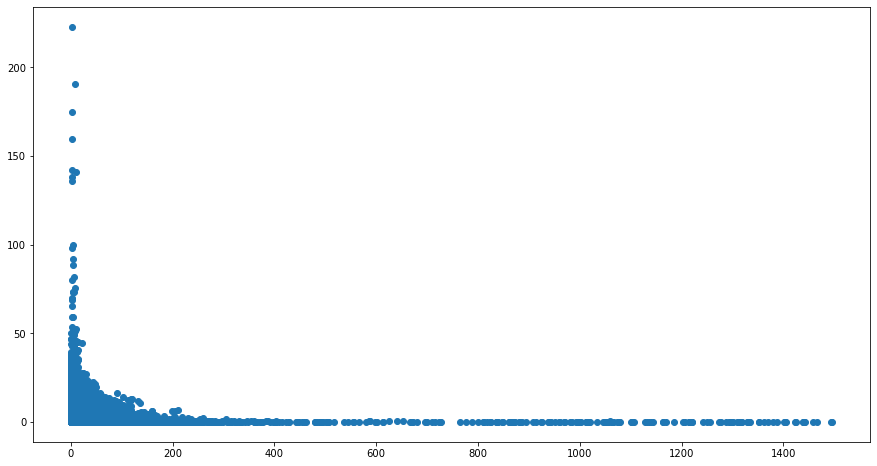

In [36]:
plt.figure(figsize=(15,8))
plt.scatter(df["time_duration"], df["average_speed"])

In [37]:
filtered_df = df[df['average_speed'] <= 35].sort_values(by='average_speed')

In [38]:
filtered_df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
111411,2024-02-24 15:30:00,2024-02-24 16:26:00,37th & O St NW / Georgetown University,37th & O St NW / Georgetown University,38.907837,-77.071660,38.907837,-77.071660,56.0,0,1,0.0,0.0
240609,2024-02-24 13:33:00,2024-02-24 14:01:00,Columbia Pike & S Highland St,Columbia Pike & S Highland St,38.862398,-77.089133,38.862398,-77.089133,28.0,0,0,0.0,0.0
240610,2024-02-24 13:54:00,2024-02-24 15:40:00,Smithsonian-National Mall / Jefferson Dr & 12t...,Smithsonian-National Mall / Jefferson Dr & 12t...,38.888774,-77.028694,38.888774,-77.028694,106.0,0,0,0.0,0.0
240612,2024-02-12 16:36:00,2024-02-12 16:37:00,17th St & Rhode Island Ave NW,17th St & Rhode Island Ave NW,38.906767,-77.038627,38.906767,-77.038627,1.0,0,0,0.0,0.0
240613,2024-02-12 11:02:00,2024-02-12 11:03:00,Smithsonian-National Mall / Jefferson Dr & 12t...,Smithsonian-National Mall / Jefferson Dr & 12t...,38.888774,-77.028694,38.888774,-77.028694,1.0,0,0,0.0,0.0


In [39]:
filtered_df.drop(filtered_df[filtered_df["start_station_name"] == filtered_df["end_station_name"]].index, inplace=True)

In [40]:
filtered_df.drop(filtered_df[filtered_df["distance_km"] <= .2].index, inplace=True)

In [41]:
filtered_df.drop(filtered_df[filtered_df["time_duration"] >= 300].index, inplace=True)

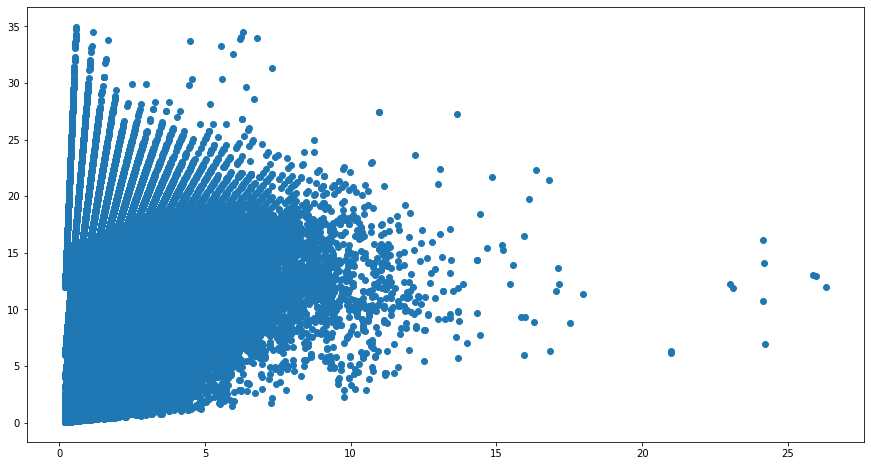

In [42]:
plt.figure(figsize=(15,8))
plt.scatter(filtered_df["distance_km"], filtered_df["average_speed"])

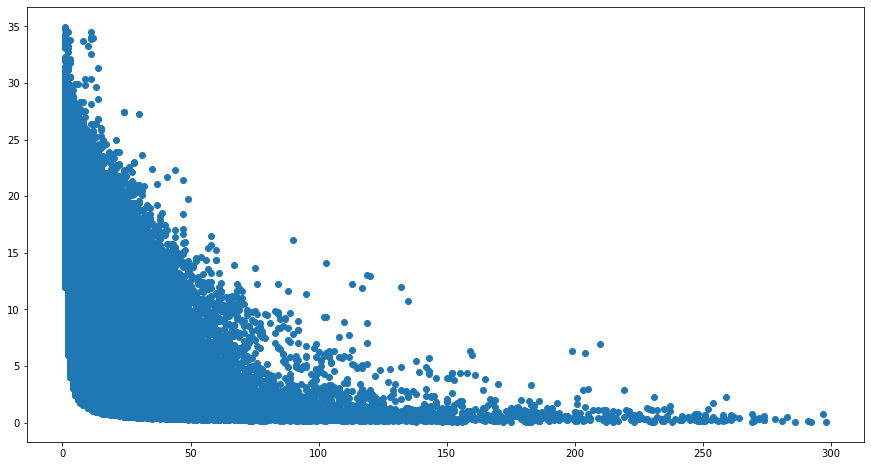

In [43]:
plt.figure(figsize=(15,8))
plt.scatter(filtered_df["time_duration"], filtered_df["average_speed"])

In [44]:
filtered_df.sort_values(by='distance_km')

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
208772,2024-02-10 07:11:00,2024-02-10 07:13:00,Rhode Island Ave Metro,MBT & Bryant St NE,38.920606,-76.995917,38.922404,-76.996023,2.0,1,0,0.200084,6.002520
8213,2024-02-03 20:24:00,2024-02-03 20:27:00,19th & G St NW,18th St & Pennsylvania Ave NW,38.898412,-77.043182,38.899680,-77.041539,3.0,0,1,0.200238,4.004761
12797,2024-02-29 12:48:00,2024-02-29 14:23:00,19th & G St NW,18th St & Pennsylvania Ave NW,38.898412,-77.043182,38.899680,-77.041539,95.0,0,0,0.200238,0.126466
142630,2024-02-05 20:27:00,2024-02-05 20:28:00,19th & G St NW,18th St & Pennsylvania Ave NW,38.898412,-77.043182,38.899680,-77.041539,1.0,0,1,0.200238,12.014282
142631,2024-02-05 20:24:00,2024-02-05 20:25:00,19th & G St NW,18th St & Pennsylvania Ave NW,38.898412,-77.043182,38.899680,-77.041539,1.0,0,1,0.200238,12.014282
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179319,2024-02-17 16:35:00,2024-02-17 18:18:00,Blenheim Blvd & North St,New Hampshire Ave & T St NW,38.846972,-77.303349,38.915544,-77.038252,103.0,0,1,24.180314,14.085620
116960,2024-02-18 11:30:00,2024-02-18 15:00:00,Monroe St & Monroe Pl,Columbus Circle / Union Station,39.083673,-77.149162,38.896960,-77.004930,210.0,0,0,24.216295,6.918941
121869,2024-02-03 09:58:00,2024-02-03 11:57:00,Reston Town Center Metro North,34th & Water St NW,38.953618,-77.359698,38.903731,-77.067528,119.0,1,0,25.874759,13.046097
19418,2024-02-24 07:15:00,2024-02-24 09:15:00,North Shore & Cameron Crescent Dr/Crescent Apa...,Harvard St & Adams Mill Rd NW,38.970145,-77.338663,38.927872,-77.043358,120.0,1,0,25.966048,12.983024


In [45]:
filtered_df["time_duration"].median()

9.0

In [46]:
filtered_df.reset_index(drop=True, inplace=True)

In [47]:
filtered_df["distance_km"].sort_values()[:50]

24740     0.200084
12072     0.200238
48        0.200238
152052    0.200238
152051    0.200238
152050    0.200238
24781     0.200238
737       0.200238
24912     0.200692
152584    0.200692
152582    0.200692
152583    0.200692
2332      0.200692
12124     0.200822
152781    0.200849
152786    0.200859
152787    0.200859
152788    0.200859
24971     0.200859
498       0.200859
24972     0.200859
24970     0.200859
45        0.200863
152792    0.200863
212       0.200863
8409      0.200863
152907    0.200946
152909    0.200946
152908    0.200946
152906    0.200946
152905    0.200946
152904    0.200946
152903    0.200946
152901    0.200946
12140     0.200946
8415      0.200946
226       0.200946
152902    0.200946
153118    0.201076
153367    0.201290
153369    0.201290
153368    0.201290
153372    0.201291
25162     0.201565
25172     0.201590
25199     0.201702
6558      0.202579
25492     0.202655
25487     0.202655
25494     0.202655
Name: distance_km, dtype: float64

In [48]:
filtered_df.iloc[3830]

started_at                         2024-02-26 21:13:00
ended_at                           2024-02-26 21:29:00
start_station_name                 16th & Irving St NW
end_station_name               Lamont & Mt Pleasant NW
start_lat                                    38.928893
start_lng                                    -77.03625
end_lat                                        38.9319
end_lng                                       -77.0388
time_duration                                     16.0
rideable_type_electric_bike                          0
member_casual_member                                 0
distance_km                                   0.400564
average_speed                                 1.502116
Name: 3830, dtype: object

In [49]:
df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
0,2024-02-01 21:18:00,2024-02-01 21:27:00,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,9.0,1,1,1.493572,9.957149
1,2024-02-15 16:46:00,2024-02-15 16:59:00,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,13.0,1,1,3.321546,15.330212
2,2024-02-07 17:42:00,2024-02-07 18:12:00,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,30.0,0,1,4.672147,9.344294
3,2024-02-22 16:43:00,2024-02-22 16:56:00,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,13.0,0,1,2.276269,10.505857
4,2024-02-10 01:11:00,2024-02-10 01:23:00,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,12.0,0,0,1.364261,6.821307


In [50]:
filtered_df[filtered_df["rideable_type_electric_bike"] == 1]["average_speed"].mean()

12.969801219401184

In [51]:
filtered_df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
0,2024-02-25 19:14:00,2024-02-26 00:00:00,14th & V St NW,13th & U St NW,38.917709,-77.031845,38.916936,-77.029631,286.0,1,0,0.209854,0.044025
1,2024-02-10 13:55:00,2024-02-10 18:53:00,13th & O St NW/ Logan Circle,14th & Q St NW,38.908735,-77.029779,38.910674,-77.031880,298.0,0,0,0.282017,0.056782
2,2024-02-26 09:58:00,2024-02-26 14:27:00,Prince St & Union St,Market Square / King St & Royal St,38.803124,-77.040363,38.804718,-77.043363,269.0,0,0,0.314635,0.070179
3,2024-02-09 07:44:00,2024-02-09 10:45:00,1st & M St SE,1st & I St SE,38.876893,-77.006072,38.878854,-77.005727,181.0,0,0,0.220127,0.072970
4,2024-02-03 21:26:00,2024-02-04 00:21:00,21st & I St NW,22nd & I St NW / Foggy Bottom,38.900722,-77.046442,38.900880,-77.048911,175.0,1,0,0.214356,0.073494


In [52]:
filtered_df["distance_km"].median()

1.5372124066472008

(array([1.93548e+05, 3.67030e+04, 4.27900e+03, 8.11000e+02, 1.75000e+02,
        2.70000e+01, 1.30000e+01, 2.00000e+00, 2.00000e+00, 7.00000e+00]),
 array([ 0.200084  ,  2.81035612,  5.42062824,  8.03090035, 10.64117247,
        13.25144459, 15.8617167 , 18.47198882, 21.08226093, 23.69253305,
        26.30280517]),
 <BarContainer object of 10 artists>)

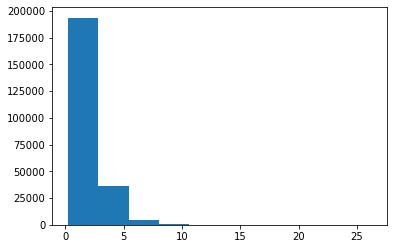

In [53]:
plt.hist(filtered_df["distance_km"])

In [54]:
# Rank start stations based on occurrences
start_station_rank = filtered_df['start_station_name'].value_counts().rank(ascending=False, method='min')

# Rank stop stations based on occurrences
end_station_rank = filtered_df['end_station_name'].value_counts().rank(ascending=False, method='min')

# Assign ranks to start and stop stations
filtered_df['start_station_rank'] = filtered_df['start_station_name'].map(start_station_rank)
filtered_df['end_station_rank'] = filtered_df['end_station_name'].map(end_station_rank)

In [55]:
filtered_df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed,start_station_rank,end_station_rank
0,2024-02-25 19:14:00,2024-02-26 00:00:00,14th & V St NW,13th & U St NW,38.917709,-77.031845,38.916936,-77.029631,286.0,1,0,0.209854,0.044025,6.0,54.0
1,2024-02-10 13:55:00,2024-02-10 18:53:00,13th & O St NW/ Logan Circle,14th & Q St NW,38.908735,-77.029779,38.910674,-77.031880,298.0,0,0,0.282017,0.056782,45.0,46.0
2,2024-02-26 09:58:00,2024-02-26 14:27:00,Prince St & Union St,Market Square / King St & Royal St,38.803124,-77.040363,38.804718,-77.043363,269.0,0,0,0.314635,0.070179,369.0,322.0
3,2024-02-09 07:44:00,2024-02-09 10:45:00,1st & M St SE,1st & I St SE,38.876893,-77.006072,38.878854,-77.005727,181.0,0,0,0.220127,0.072970,137.0,40.0
4,2024-02-03 21:26:00,2024-02-04 00:21:00,21st & I St NW,22nd & I St NW / Foggy Bottom,38.900722,-77.046442,38.900880,-77.048911,175.0,1,0,0.214356,0.073494,42.0,57.0


In [56]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Reshape ranks to a 2D array for scaling
start_station_rank_scaled = scaler.fit_transform(filtered_df['start_station_rank'].values.reshape(-1, 1))
end_station_rank_scaled = scaler.fit_transform(filtered_df['end_station_rank'].values.reshape(-1, 1))

# Assign scaled ranks to DataFrame
filtered_df['start_station_rank_scaled'] = start_station_rank_scaled
filtered_df['end_station_rank_scaled'] = end_station_rank_scaled

In [57]:
filtered_df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed,start_station_rank,end_station_rank,start_station_rank_scaled,end_station_rank_scaled
0,2024-02-25 19:14:00,2024-02-26 00:00:00,14th & V St NW,13th & U St NW,38.917709,-77.031845,38.916936,-77.029631,286.0,1,0,0.209854,0.044025,6.0,54.0,0.006748,0.071816
1,2024-02-10 13:55:00,2024-02-10 18:53:00,13th & O St NW/ Logan Circle,14th & Q St NW,38.908735,-77.029779,38.910674,-77.031880,298.0,0,0,0.282017,0.056782,45.0,46.0,0.059379,0.060976
2,2024-02-26 09:58:00,2024-02-26 14:27:00,Prince St & Union St,Market Square / King St & Royal St,38.803124,-77.040363,38.804718,-77.043363,269.0,0,0,0.314635,0.070179,369.0,322.0,0.496626,0.434959
3,2024-02-09 07:44:00,2024-02-09 10:45:00,1st & M St SE,1st & I St SE,38.876893,-77.006072,38.878854,-77.005727,181.0,0,0,0.220127,0.072970,137.0,40.0,0.183536,0.052846
4,2024-02-03 21:26:00,2024-02-04 00:21:00,21st & I St NW,22nd & I St NW / Foggy Bottom,38.900722,-77.046442,38.900880,-77.048911,175.0,1,0,0.214356,0.073494,42.0,57.0,0.055331,0.075881


In [58]:
filtered_df.drop(["start_station_name", "end_station_name"], axis=1, inplace=True)

In [59]:
filtered_df.head()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed,start_station_rank,end_station_rank,start_station_rank_scaled,end_station_rank_scaled
0,2024-02-25 19:14:00,2024-02-26 00:00:00,38.917709,-77.031845,38.916936,-77.029631,286.0,1,0,0.209854,0.044025,6.0,54.0,0.006748,0.071816
1,2024-02-10 13:55:00,2024-02-10 18:53:00,38.908735,-77.029779,38.910674,-77.031880,298.0,0,0,0.282017,0.056782,45.0,46.0,0.059379,0.060976
2,2024-02-26 09:58:00,2024-02-26 14:27:00,38.803124,-77.040363,38.804718,-77.043363,269.0,0,0,0.314635,0.070179,369.0,322.0,0.496626,0.434959
3,2024-02-09 07:44:00,2024-02-09 10:45:00,38.876893,-77.006072,38.878854,-77.005727,181.0,0,0,0.220127,0.072970,137.0,40.0,0.183536,0.052846
4,2024-02-03 21:26:00,2024-02-04 00:21:00,38.900722,-77.046442,38.900880,-77.048911,175.0,1,0,0.214356,0.073494,42.0,57.0,0.055331,0.075881


In [60]:
filtered_df.drop(["started_at", "ended_at"], axis = 1, inplace=True)

In [61]:
filtered_df.drop(["start_lat", "start_lng", "end_lat", "end_lng"], axis = 1, inplace=True)

In [62]:
filtered_df.head()

,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed,start_station_rank,end_station_rank,start_station_rank_scaled,end_station_rank_scaled
0,286.0,1,0,0.209854,0.044025,6.0,54.0,0.006748,0.071816
1,298.0,0,0,0.282017,0.056782,45.0,46.0,0.059379,0.060976
2,269.0,0,0,0.314635,0.070179,369.0,322.0,0.496626,0.434959
3,181.0,0,0,0.220127,0.072970,137.0,40.0,0.183536,0.052846
4,175.0,1,0,0.214356,0.073494,42.0,57.0,0.055331,0.075881


In [63]:
from sklearn.model_selection import train_test_split

X = filtered_df.drop(["distance_km", "average_speed"], axis=1)
y = filtered_df['distance_km']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rf = RandomForestRegressor()

In [67]:
rf.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [68]:
predictions = rf.predict(X_test_scaled)

In [69]:
from sklearn.metrics import mean_squared_error

In [70]:
mse = mean_squared_error(y_test, predictions)

In [71]:
mse

0.45221986420358046

In [93]:
from sklearn.model_selection import GridSearchCV

In [95]:
# Define the parameter grid you want to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestRegressor instance
rf = RandomForestRegressor()

# Initialize GridSearchCV with the parameter grid and RandomForestRegressor
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Print the best score found
print("Best score:", grid_search.best_score_)

predictions = grid_search.predict(X_test)

mse = mean_squared_error(y_test, predictions)

/Users/ankithb/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/ankithb/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/ankithb/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/ankithb/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warn

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best score: 0.7163958170633092


In [72]:
# start_station_rank	end_station_rank remove these columns

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lr = LinearRegression()

In [75]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [76]:
y_pred = lr.predict(X_test_scaled)

In [77]:
mse = mean_squared_error(y_test, y_pred)

In [78]:
mse

1.3155876271787272

In [79]:
# RUN WITH K-FOLD CROSS VALIDATION

In [80]:
X = filtered_df.drop(["distance_km", "average_speed"], axis=1)
y = filtered_df['distance_km']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

2024-05-06 14:43:04.946164: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [83]:
model = Sequential()

model.add(Dense(units = 20, activation = 'relu'))
model.add(Dropout(.1))
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dropout(.1))
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dropout(.1))
model.add(Dense(units = 5, activation = 'relu'))
model.add(Dropout(.1))
model.add(Dense(units = 1, activation = 'linear'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [84]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [85]:
from tensorflow.keras.callbacks import EarlyStopping

In [86]:
#stops when validation loss is not dropping for 3 epochs
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 15, verbose = 1)

In [87]:
#Fitting model
model.fit(X_train, y_train, 
          epochs = 800,
         validation_data=(X_test, y_test),
         verbose = 1, 
         callbacks=[early_stop])

Epoch 1/800
5890/5890 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 1.5949 - val_loss: 0.6779
Epoch 2/800
5890/5890 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.8649 - val_loss: 0.7145
Epoch 3/800
5890/5890 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.8475 - val_loss: 0.7116
Epoch 4/800
5890/5890 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.8214 - val_loss: 0.6772
Epoch 5/800
5890/5890 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.8170 - val_loss: 0.6970
Epoch 6/800
5890/5890 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.8155 - val_loss: 0.6958
Epoch 7/800
5890/5890 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.8059 - val_loss: 0.6934
Epoch 8/800
5890/5890 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.8218 - val_loss: 0.6618
Epoch 9/800
5890/5890 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.7981 - val_loss: 0.7273
Epoch 10/800
5890/5890 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.7806 - val_loss: 0.6557
Epoch 11/800
5890/5890 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.7971 - val_loss: 0.6417
Epoch 12/800
5890/

<AxesSubplot:>

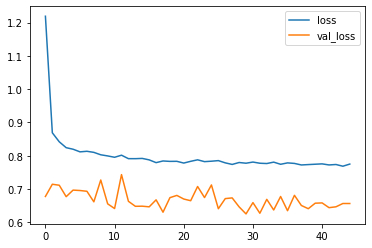

In [88]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [89]:
prediction = model.predict(X_test)

1473/1473 ━━━━━━━━━━━━━━━━━━━━ 1s 579us/step


In [90]:
mse = mean_squared_error(y_test, prediction)

In [91]:
mse

0.656722908845182